In [47]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math
import datetime
import platform

In [48]:
mnist_dataset = tf.keras.datasets.mnist
(x_train,y_train), (x_test,y_test) = mnist_dataset.load_data()


In [49]:
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)


x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [50]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


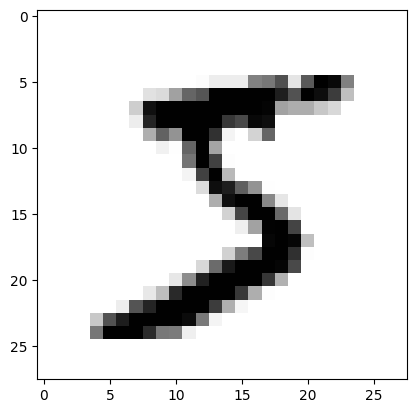

In [51]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [39]:
x_train_normalized= x_train/255
x_test_normalized = x_test/255

In [40]:
with pd.option_context('display.float_format','{:,.2}'.format):
  display(pd.DataFrame(x_train_normalized[0]))

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.69,0.1,0.65,1.0,0.97,0.5,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.12,0.14,...,0.88,0.67,0.99,0.95,0.76,0.25,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.19,0.93,0.99,...,0.36,0.32,0.32,0.22,0.15,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071,0.86,0.99,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.61,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
from keras.models import Model,Sequential

In [53]:
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout

In [54]:
model = Sequential()

In [55]:
model.add(Conv2D(filters = 32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1), padding='Same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1),padding='Same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 128,kernel_size=(3,3),activation='relu',input_shape=(28,28,1),strides=1, padding='Same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(236,activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [57]:
model.fit(x_train,y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 126s 66ms/step - accuracy: 0.7961 - loss: 1.4788


In [58]:
pred1 = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


In [60]:
for i  in range(10):
  print(np.argmax(pred1[i]),end="         ")
  print(y_test[i])
  # plt.imshow(_test[i],cmap=plt.cm.binary)
  # plt.show()

7         7
2         2
1         1
0         0
4         4
1         1
4         4
9         9
5         5
9         9
